# Les Optimisations de type réseau

# Introduction.
Les optimisations de type réseaux ont cela en commun qu'elles mettent en jeu 
des noeuds (nodes) et des arrêtes valuées (arcs).

Dans cette étude, je vais tenter, une fois les optimisations classiques abordées,
d'étudier la possibilité d'y ajouter des paramètres non linéaires dans un second temps.


Etude globale proposée par <b> Estelle Derrien - Github estellederrien </b>

!! Création en cours - sujet à de lourdes modifications !!
 
# Sommaire

   - 1. <b>Transports</b> (Transportation problem)
         - Description
         - Exemples avec Python Pulp : Minimisation de coût de transport linéaire.
            - Un exemple de transport sans charges (uncapacited transportation) 
            - Le même exemple avec boucles FOR.
            - Un exemple de transport chargé (capacited transportation)
            - La différence du transport à charges fixes ( Fixed Charge Transportation) et les autres.
            - Modélisation mathématique
            - Résolution avec Pulp Sans boucles For
            - Résolution avec Pulp Avec boucles For
            - Le même exemple avec Gurobi
            - Le même exemple avec Python Cplex
            - Le même exemple avec le Solveur Excel
            - Le même exemple avec NetworkX
         - Transport avec un pourcentage de pertes.
         - Second exemple : Maximisation de profit et taxes variables.
         - Un exemple avec les coûts non linéaires.
         

   - 2. <b>Transports avec relais</b> (Transshipment problem)
         - Description
         - Modélisation mathématique
         - Un exemple avec Python Pulp
            - Sans boucles For
            - Avec boucles For
         - Transshipment avec un dépot supplémentaire à côté des usines (dummy).   
            - avec Pulp
      - Ajout de paramètres non linéaires . 
              
   - 3. <b>Emplacements de fournisseur</b> ( facility location or creation)
         - Description
            - Minimisation du coût global de positionnement
            - Minimisation de la distance globale.
                  - Distance Euclidienne vs distance Manhattan
         - Modélisation mathématique
         - Exemples avec les solveurs
         - Des solutions réalistes avec GeoPanda
         - Ajouts de paramètres non linéaires
         
   - 4. <b>Affectation</b> (Assignment problem)
         - Description
         - Variantes
         - Modélisation mathématique
         - Exemples avec Google Or Tools et Pulp 
         - Ajout de contraintes 
         - Affectaction non linéaire


   - 5. <b>Gestion de projet.</b> (Project management critical path)
         - Description 
   - 6. <b> Problème de couverture. </b> ( Set cover - Set partitioning subset)
         - Descriptions
              - Un premier exemple avec l'algo glouton
              - Couverture par sous ensembles minimum
                  - Exemple 1 : Sélectionner le quartier qui couvre tout un plan
                  - Modélisation mathématique
                  - Solution avec Python Pulp
                  - Exemple 2 : Sélectionner le nombre minimum de caméras pour couvrir toute une ville
                  - Modélisation mathématique
                  - Solution avec Python Pulp
                  - Exemple 3 : Sélection d'employés par couverture minimales des compétences nécessaires au projet 
                  - Solution avec Python Pulp
              - Couverture par sous ensembles minimum avec prise en compte du poids
                  - Modélisation mathématique
                  - Exemples avec les solveurs. 
              - Couverture minimale par sommets
                  - Modélisation mathématique
                  - Exemples avec les solveurs. 
              - Couverture maximale 
                  - Modélisation mathématique
                  - Exemples avec les solveurs. 



   -  <b> Liens </b>








# 1. Transports (Transportation problem)

Le Problème générique de base :

<div style="text-align:center">
<img src="img/transport.png">
</div>



# Transport sans charges : Exemple avec Pulp

Dans ce premier exemple, on minimise uniquement la distance totale et on demande à Pulp de sélectionner les routes qui ont les valeurs les plus petites, on utilise pour cela des variables de décision binaires.
Ici il n'y a que 2 fournisseurs, mais cela fonctionne avec 100 fournisseurs ( avec des boucles for,sinon, ce serait fastidieux à écrire).

<div style="text-align:center">
<img src="img/uncapacited2.jpg"></img>
</div>

In [206]:
from pulp import *
 
# Les variables de décision contiennent la décision si on choisit une route ou pas
XA1 = LpVariable('XA1', lowBound=0, cat='Binary')
XA2 = LpVariable('XA2', lowBound=0, cat='Binary')
XA3 = LpVariable('XA3', lowBound=0, cat='Binary')
XA4 = LpVariable('XA4', lowBound=0, cat='Binary')
XA5 = LpVariable('XA5', lowBound=0, cat='Binary')
XB1 = LpVariable('XB1', lowBound=0, cat='Binary')
XB2 = LpVariable('XB2', lowBound=0, cat='Binary')
XB3 = LpVariable('XB3', lowBound=0, cat='Binary')
XB4 = LpVariable('XB4', lowBound=0, cat='Binary')
XB5 = LpVariable('XB5', lowBound=0, cat='Binary')
 
# C'est un problème de minimisation
Problem = LpProblem('optimisation_transport',LpMinimize)
 
# La fonction objectif est de minimiser la distance, en tenant compte de chaque route.
Problem += 3*XA1 + 1*XA2 + 3*XA3 + 2*XA4 + 9*XA5 + 25*XB1 + 15*XB2 + 32*XB3 + 22*XB4 + 8*XB5
 
# Les contraintes
# On veut qu'il existe au moins 5 routes vers les 5 magasins.
Problem += (XA1 + XA2 + XA3 + XA4 + XA5 + XB1 + XB2 + XB3 + XB4 + XB5) >= 5
 
# On résouds
Problem.solve()
 
# On imprime le résultat
print('Statut:', LpStatus[Problem.status])
print('Distance totale minimisée = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Choix de la route :',i.name, '=', i.varValue)

Statut: Optimal
Distance totale minimisée =  17.0
Choix de la route : XA1 = 1.0
Choix de la route : XA2 = 1.0
Choix de la route : XA3 = 1.0
Choix de la route : XA4 = 1.0
Choix de la route : XB5 = 1.0


# Le même exemple avec boucles For

Qu'en sera-t-il si on a un problème avec 200 routes ? Doit on toutes les taper à  la main ?
Non, On récrée le même code, mais on utilise désormais les <b>itérations.</b>
On utilise les listes en compréhension.
Souvent, lors de problèmes de transport, on associe deux tableaux pour créer des variables de décision.
Dès qu'on doit créer toutes les routes possibles, alors, on utilise cette technique.
(Aaron Stubberfield)

In [207]:
import pulp as p

# Variables de décision
fournisseurs = ['A','B']
clients = ['1','2','3','4','5']
costs = [  
# clients   # 1  2  3  4  5
                [3, 1, 3, 2,9],      # A   fournisseurs
                [25, 15, 32, 22,8],  # B
]

# C'est un problème de minimisation
Problem = p.LpProblem('optimisation_transport',p.LpMinimize)

# Créer une liste de toutes les routes possibles
# Ca va nous servir à itérer dans la fonction objectif et dans les contraintes.
Routes = [(w, b) for w in fournisseurs  for b in clients]
print(Routes)

# Créer un dictionnaire de variables de décisions des routes
# Là on spécifie que les routes sont un choix binaire, soit on les utilise, soit pas.
# Dans la version précédente, on l'a écrit manuellement,  par exemple on a nommé la route du fournisseur
# A au client 1, On l'a écrit XA1, et la route du fournisseur B au client 1, on l'a nommé XB1
# et on a dit que ce sont des variables de décision.
# La différence, c'est que dans la ligne suivante, c'est l'ordinateur qui les nomme automatiquement
# En itérant que le tableau des fournisseurs et des clients.
# Si on a 200 routes, on est obligé de faire comme ça, on ne va pas tout taper à la main.
# Mais basiquement, il ne faut pas être impressioné, cela ne fait que refaire ce qu'on a fait à la main
# En écrivant chaque route et en les transformant en variables de décision.
vars = p.LpVariable.dicts("Route", (fournisseurs , clients), 0, None, p.LpBinary)
print(vars)

# Créer un dictionnaire des coûts de chaque routes
cost = p.makeDict([fournisseurs,clients], costs, 0)

# Fonction objectif
Problem += p.lpSum([cost[w][b]  * vars[w][b]  for (w, b) in Routes])

# Contrainte
Problem += (p.lpSum([ vars[w][b]  for (w, b) in Routes]) >= 5 , "minimum_de_5_routes")

# On résouds
Problem.solve()
 
# On imprime le résultat
print('Statut:', p.LpStatus[Problem.status])
print('Cout total minimisé = ', p.value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Choix de la route :',i.name, '=', i.varValue)


[('A', '1'), ('A', '2'), ('A', '3'), ('A', '4'), ('A', '5'), ('B', '1'), ('B', '2'), ('B', '3'), ('B', '4'), ('B', '5')]
{'A': {'1': Route_A_1, '2': Route_A_2, '3': Route_A_3, '4': Route_A_4, '5': Route_A_5}, 'B': {'1': Route_B_1, '2': Route_B_2, '3': Route_B_3, '4': Route_B_4, '5': Route_B_5}}
Statut: Optimal
Cout total minimisé =  17.0
Choix de la route : Route_A_1 = 1.0
Choix de la route : Route_A_2 = 1.0
Choix de la route : Route_A_3 = 1.0
Choix de la route : Route_A_4 = 1.0
Choix de la route : Route_B_5 = 1.0


# La différence du transport à charges fixes ( Fixed Charge Transportation) et TP.

https://koreascience.kr/article/JAKO201220962917752.pdf

Le problème de transport de charges fixes (FCTP) est
une extension du problème de transport (linéaire) (TP).
Depuis que le problème de charge fixe a été initialisé par Hirsch
et Danzig (1968), il a été largement appliqué dans de nombreux
problèmes de prise de décision et d'optimisation. intéressé
les lecteurs peuvent se référer à Sun et al. (1998) et Gottlieb et
Paulmann (1998). Le TP reflète la situation d'un seul produit parmi un ensemble d'
usines à un ensemble de clients. Les capacités des usines
et les demandes des clients sont connues à l'avance,
et un plan de transport réalisable doit obéir à ces règles. 
L'objectif est de minimiser le coût de l'expédition globale
avec le coût de transport entre les usines et le client
dépendant linéairement de la quantité transportée de
la commodité. 
Bien qu'il s'agisse d'un modèle utile, en pratique
des coûts fixes surviennent une fois qu'un transport est estimé
entre  une usine et un client. La FCTP prend en
compte ces coûts fixes, de sorte que le TP est un FCTP avec
coûts fixes égaux à 0 pour tous les itinéraires.



Tout d'abord, de façon générale:
Quelle est la différence entre les coûts variables et les coûts fixes ?
Les coûts variables changent en fonction de la quantité de production produite, Le coût variable est le coût qui varie avec l'évolution du nombre d'unités de production. 
Les coûts variables peuvent inclure la main-d'œuvre, les commissions et les matières premières. 
Les coûts fixes restent les mêmes quelle que soit la production. Les coûts fixes peuvent inclure les paiements de location et de location, les assurances et les paiements d'intérêts.

Maintenant, dans les cadre des optimisations de transport:
Les paiements hypothécaires et les paiements d'assurance des camions sont généralement les coûts fixes les plus importants. Les coûts variables sont les dépenses que vous payez lorsque vous conduisez votre camion. Le montant que vous dépensez augmente directement avec le nombre de miles que vous conduisez.



# Transport chargés avec Pulp

<div style="text-align:center">
<img src="img/transport2.png">
</div>

J'ai 2 usines A et B qui construisent le même objet, leur capacité de production est 1000 et 4000, 

j'ai 5 magasins, qui ont une demande de 500,900,1800,200,700. La demande totale est donc de 4100.

Le côut de chaque route d'une usine vers un magasin est :

In [208]:
# Magasins      1  2  3  4  5
# Coûts         2, 4, 5, 2, 1  # A   Usines
# Coûts         3, 1, 3, 2, 3  # B

Quelles livraisons effectuer afin de minimiser le coût global de transport ?

## Modélisation Math 

$$
\begin{matrix}
n & = & \text{Nombre d'usines} \\
m & = & \text{Nombre de magasins} \\
c_{ij} & = & \text{coût de transport de usine j à magasin i} \\
x_{ij} & = &\text{l'usine j est en liaison avec magasin i} \\
C_{j} & = & \text{capacité usine j} \\
D_{j} & = & \text{demande magasin i} \\


\end{matrix}
$$


## Modélisation Math (Anglais)

<img src="img/transport_mdl.png"></img>

# Résoudre avec Python Pulp

Tout d'abord, la version sans boucle FOR, puis, la version avec les boucles FOR.

Pour modéliser sans boucle For plus facilement, on regarde cette vidéo : 

https://www.youtube.com/watch?v=WZIyL6pcItY


In [209]:
from pulp import *
 
# Les variables de décision contiennent le nombre d'objets à transporter de l'usine au magasin.
# Ca représente chaque route.
XA1 = LpVariable('XA1', lowBound=0, cat='Integer')
XA2 = LpVariable('XA2', lowBound=0, cat='Integer')
XA3 = LpVariable('XA3', lowBound=0, cat='Integer')
XA4 = LpVariable('XA4', lowBound=0, cat='Integer')
XA5 = LpVariable('XA5', lowBound=0, cat='Integer')
XB1 = LpVariable('XB1', lowBound=0, cat='Integer')
XB2 = LpVariable('XB2', lowBound=0, cat='Integer')
XB3 = LpVariable('XB3', lowBound=0, cat='Integer')
XB4 = LpVariable('XB4', lowBound=0, cat='Integer')
XB5 = LpVariable('XB5', lowBound=0, cat='Integer')
 
# C'est un problème de minimisation
Problem = LpProblem('optimisation_transport',LpMinimize)
 
# La fonction objectif est de minimiser le cout global de transport, en tenant compte de chaque route.
Problem += 2*XA1 + 4*XA2 + 5*XA3 + 2*XA4 + 1*XA5 + 3*XB1 + 1*XB2 + 3*XB3 + 2*XB4 + 3*XB5
 
# Les contraintes

# capacité de usine A
Problem += XA1 + XA2 + XA3 + XA4 + XA5 <= 1000

# capacité de usine B
Problem += XB1 + XB2 + XB3 + XB4 + XB5 <= 4000

# Demande magasin 1 
Problem += XA1 + XB1 >= 500

# Demande magasin 2
Problem += XA2 + XB2 >= 900

# Demande magasin 3
Problem += XA3 + XB3 >= 1800

# Demande magasin 4
Problem += XA4 + XB4 >= 200

# Demande magasin 5
Problem += XA5 + XB5 >= 700


 
# On résouds
Problem.solve()
 
# On imprime le résultat
print('Statut:', LpStatus[Problem.status])
print('Cout total minimisé = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Choix de la route :',i.name, '=', i.varValue)



Statut: Optimal
Cout total minimisé =  8600.0
Choix de la route : XA1 = 300.0
Choix de la route : XA5 = 700.0
Choix de la route : XB1 = 200.0
Choix de la route : XB2 = 900.0
Choix de la route : XB3 = 1800.0
Choix de la route : XB4 = 200.0


- La version avec les boucles FOR .

On crée des boucles FOR afin de créer les routes automatiquement, si il y en a plus de 300, c'est beaucoup plus pratique par exemple. On voit que le résultat de l'optimisation est identique au précédent.

In [210]:
import pulp as p

# Créer la liste de toutes les usines
Usines = ["A", "B"]

# Créer un dictionnaire de la capacité de chaque usine
capacite = {"A": 1000, "B": 4000}

# Créer la liste de chaque magasin
Magasins = ["1", "2", "3", "4", "5"]

# Créer un dictionnaire de la demande de chaque magasin
demand = {
"1": 500,
"2": 900,
"3": 1800,
"4": 200,
"5": 700,
}

# Créer la liste de coûts (matrice) de transports de chaque route d'une usine vers un magasins
# Ce sont les valuations des arcs
couts = [  
# Magasins   # 1  2  3  4  5
        [2, 4, 5, 2, 1],  # A   Usines
        [3, 1, 3, 2, 3],  # B
     ]
  
# On transforme les coûts en un dictionnaire - https://stackoverflow.com/questions/44527562/how-to-create-a-3-dimensional-dictionary-from-3-lists-in-python
couts = p.makeDict([Usines, Magasins], couts, 0)

# On veut minimiser le cout global de transport, on crée notre problème
prob = p.LpProblem("Distribution_Problem", p.LpMinimize)

# On crée une liste de tuples qui contiennent toutes les routes possibles.
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w, b) for w in Usines for b in Magasins]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = p.LpVariable.dicts("Route", (Usines, Magasins), 0, None, p.LpInteger)

# On ajoute d'abord la fonction objectif.
prob += (p.lpSum([vars[w][b] * couts[w][b] for (w, b) in Routes]),"Somme_de_couts_de_transport",)

# The capacite maximum constraints are added to prob for each capacite node (usines)
for w in Usines:
    prob += (p.lpSum([vars[w][b] for b in Magasins]) <= capacite[w],"Somme_des_objets_sortis_de_usine%s" % w,)

# The demand minimum constraints are added to prob for each demand node (magasins)
for b in Magasins:
    prob += (
        p.lpSum([vars[w][b] for w in Usines]) >= demand[b],"Somme_des_objets_aux_magasins%s" % b,)


# On exécute le solveur
prob.solve()

# On affiche le statut de la solution
print ("Status:",p.LpStatus [prob.status])



# Afficher l'optimium de chaques variables
for i in Problem.variables():
    if i.varValue > 0:
        print('Choix de la route :',i.name, '=', i.varValue)


# The optimised objective function value is printed to the screen
print ("objectif - coût global minimisé : ", p.value (prob.objective))


    

Status: Optimal
Choix de la route : XA1 = 300.0
Choix de la route : XA5 = 700.0
Choix de la route : XB1 = 200.0
Choix de la route : XB2 = 900.0
Choix de la route : XB3 = 1800.0
Choix de la route : XB4 = 200.0
objectif - coût global minimisé :  8600.0


# Le même exemple avec Gurobi

On voit que Gurobi trouve la même solution que le solveur Python Pulp.

In [211]:
import gurobipy as gp
from gurobipy import GRB
try:

    factories = ['A','B']

    stores = ['1','2','3','4','5']

    cost = {
        ('A','1'): 2,
        ('A','2'): 4,
        ('A','3'): 5,
        ('A','4'): 2,
        ('A','5'): 1,
        ('B','1'): 3,
        ('B','2'): 1,
        ('B','3'): 3,
        ('B','4'): 2,
        ('B','5'): 3
    }

    supply = {
        ('A'): 1000,
        ('B'): 4000
    }

    demand = {
        ('1'): 500,
        ('2'): 900,
        ('3'): 1800,
        ('4'): 200,
        ('5'): 700,

    }

    # Create a new model
    m = gp.Model("transport_problem_1")

    # Create variables
    flow = {}
    for f in factories:
        for s in stores:
            flow[f,s] = m.addVar(obj=cost[f,s], name='flow_%s_%s' % (f, s))

    # Integrate new variables
    m.update()

    # Add supply constraints
    for f in factories:
        m.addConstr(gp.quicksum(flow[f,s] for s in stores) <= supply[f], 'supply_%s' % (f))
    
    # Add demand constraints
    for s in stores:
        m.addConstr(gp.quicksum(flow[f,s] for f in factories) >= demand[s], 'demand_%s' % (s))

    # Optimize the model. The default ModelSense is to is to minimize the objective, which is what we want.
    m.optimize()

    # Print solution
    if m.status == GRB.status.OPTIMAL:
        print ('\nOptimal flows :')
        for f in factories:
            for s in stores:
                print (f, '->', s, ':', flow[f,s].x)

except gp.GurobiError:
    print ('Error reported')

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i5-8350U CPU @ 1.70GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 10 columns and 20 nonzeros
Model fingerprint: 0x39505a07
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 4e+03]
Presolve time: 0.01s
Presolved: 7 rows, 10 columns, 20 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   4.100000e+03   0.000000e+00      0s
       7    8.6000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 7 iterations and 0.01 seconds (0.00 work units)
Optimal objective  8.600000000e+03

Optimal flows :
A -> 1 : 300.0
A -> 2 : 0.0
A -> 3 : 0.0
A -> 4 : 0.0
A -> 5 : 700.0
B -> 1 : 200.0
B -> 2 : 900.0
B -> 3 : 1800.0
B -> 4 : 200.0
B -> 5 : 0.0


# Le même modèle avec Python Cplex

On rappelle le modèle mathématique, et on voit si le code et les boucles for correspondent , on s'entraine mentalement à passer de l'un à l'autre, on voit que la solution est identique à celle du solveur Python Pulp: 

<img src="img/transport_mdl.png"></img>

In [212]:
import cplex

from docplex.mp.model import Model


capacities = {1: 1000, 2: 4000}
demands = {3: 500, 4: 900, 5: 1800, 6:200,7:700}
costs = {(1,3): 2, (1,4):4, (1,5):5, (1,6):2,(1,7):1,
         (2,3): 3, (2,4):1, (2,5):3, (2,6):2,(2,7):3,
         }

# Python ranges will be used to iterate on source, target nodes.
source = range(1, 3) # {1, 2}
target = range(3, 8) # {3,4,5,6,7}

tm = Model(name='transportation')

# create flow variables for each couple of nodes
# x(i,j) is the flow going out of node i to node j
x = {(i,j): tm.continuous_var(name='x_{0}_{1}'.format(i,j)) for i in source for j in target}

# each arc comes with a cost. Minimize all costed flows
tm.minimize(tm.sum(x[i,j]*costs.get((i,j), 0) for i in source for j in target))

tm.print_information()


# for each node, total outgoing flow must be smaller than available quantity
for i in source:
    tm.add_constraint(tm.sum(x[i,j] for j in target) <= capacities[i])
    
# for each target node, total ingoing flow must be greater thand demand
for j in target:
    tm.add_constraint(tm.sum(x[i,j] for i in source) >= demands[j])



tms = tm.solve()
# assert tms
tms.display()

# A -> 1 : 300.0
# A -> 2 : 0.0
# A -> 3 : 0.0
# A -> 4 : 0.0
# A -> 5 : 700.0
# B -> 1 : 200.0
# B -> 2 : 900.0
# B -> 3 : 1800.0
# B -> 4 : 200.0
# B -> 5 : 0.0

Model: transportation
 - number of variables: 10
   - binary=0, integer=0, continuous=10
 - number of constraints: 0
   - linear=0
 - parameters: defaults
 - objective: minimize
 - problem type is: LP
solution for: transportation
objective: 8600.000
status: OPTIMAL_SOLUTION(2)
x_1_3 = 300.000
x_1_7 = 700.000
x_2_3 = 200.000
x_2_4 = 900.000
x_2_5 = 1800.000
x_2_6 = 200.000


## Un exemple avec NetworkX

On ne peut pas traiter notre exemple de base avec netWork X, parce que avec cette librairie et leur algo, la somme des demandes doit être égale à 0, cela peut néanmoins servir dans d'autres cas.
La somme des demandes doit être 0 sinon, le problème est infeasible.
Note that the sum of the demands should be 0 otherwise the problem in not feasible.

https://networkx.org/documentation/networkx-2.4/reference/algorithms/generated/networkx.algorithms.flow.min_cost_flow.html#networkx.algorithms.flow.min_cost_flow

https://or.stackexchange.com/questions/4386/fast-algorithm-for-transportation-problem-in-python

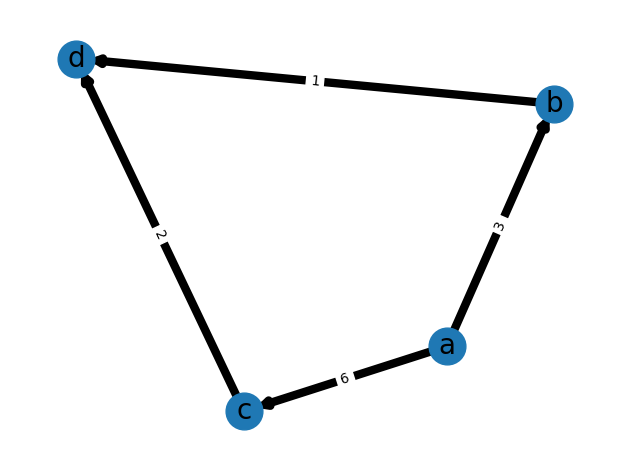

{'a': {'b': 4, 'c': 1}, 'd': {}, 'b': {'d': 4}, 'c': {'d': 1}}


In [213]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_node('a', demand = -5)
G.add_node('d', demand = 5)
G.add_edge('a', 'b', weight = 3, capacity = 4)
G.add_edge('a', 'c', weight = 6, capacity = 10)
G.add_edge('b', 'd', weight = 1, capacity = 9)
G.add_edge('c', 'd', weight = 2, capacity = 5)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


flowDict = nx.min_cost_flow(G)

print(flowDict)

# Transport avec un pourcentage de pertes.

https://or.stackexchange.com/questions/10582/classic-transportation-problem-with-integrated-losses-during-transport

# 2. Transports avec relais (Transshipment problem)

L'optimisation avec relais est similaire à l'optimisation du transport, sauf qu'il y a des relais intermédiaires.Par exemple, l'expédition de Paris à Strasbourg via Nancy peut être moins chère que l'expédition directe (sans escale) à Strasbourg. Dans ce modèle, les coûts sont <b>linéaires</b>.

L'optimisation générique de base : 

<div style="text-align:center">
<img src="img/transshipment2.png"></img>
</div>

Un exemple optimisation un peu plus complexe :
<div style="text-align:center">
<img src="img/transshipment.png"></img>
</div>

La formulation LP est également similaire, en ce sens qu'elle implique un objectif de minimiser le coût de transport sur tous les arcs, et un ensemble de contraintes de conservation de flux. Les deux premières contraintes concernent les nœuds d'approvisionnement et indiquent que le flux sortant de chaque nœud d'approvisionnement doit être égal à la capacité de ce nœud, plus tout flux entrant dans ce même nœud. Les deux contraintes suivantes concernent les nœuds intermédiaires et indiquent que le flux entrant dans un nœud intermédiaire doit être égal au flux sortant de ce nœud. Les deux dernières contraintes concernent les nœuds de demande et indiquent que l'afflux dans chaque nœud de demande doit être égal à la demande à ce nœud. Le domaine des variables doit être supérieur ou égal à zéro.

Un bon lien:
https://www.youtube.com/watch?v=ABMPgSApdUw

Un autre bon lien :
https://twiki.esc.auckland.ac.nz/do/view/OpsRes/TransshipmentProblem

# La modélisation mathématique (Anglais)

"The American Steel Transshipment Problem"

<div style="text-align:center">
<img src="img/transshipment_mdl.png"></img>
</div>

avec 
- S =  Ensemble des usines ( Suppliers)
- D = Ensemble des clients
- T = Ensemble des relais intermédiaires 
- A = Ensemble des routes possibles.
- c = coût par route

# Notre problème à résoudre

<div style="text-align:center">
<img src="img/Problem.webp"></img>
</div>

# Un exemple avec Pulp

Tout d'abord, une version sans Boucles FOR, puis la version avec les boucles FOR

In [214]:
# Import PuLP modeler functions
from pulp import *
 
# variables

# Routes vers les relais intermédaires
x1 = LpVariable('x1', lowBound=0, cat='Integer')
x2 = LpVariable('x2', lowBound=0, cat='Integer')

# Routes des relais intermédaires vers les clients
x3 = LpVariable('x3', lowBound=0, cat='Integer')
x4 = LpVariable('x4', lowBound=0, cat='Integer')
x5 = LpVariable('x5', lowBound=0, cat='Integer')
x6 = LpVariable('x6', lowBound=0, cat='Integer')
x7 = LpVariable('x7', lowBound=0, cat='Integer')
x8 = LpVariable('x8', lowBound=0, cat='Integer')
x9 = LpVariable('x9', lowBound=0, cat='Integer')
x10 = LpVariable('x10', lowBound=0, cat='Integer')
 
# On veut minimiser le coû global de transport
Problem = LpProblem('transshipment_problem',LpMinimize)
 
# La fonction objectif résume le côut de toutes les routes
Problem += 7*x1 + 4*x2 + 6*x3 + 7*x4 + 3*x5 + 9*x6 + 5*x7 + 9*x8 + 7*x9 + 2*x10
 
# Les contraintes
# Production des usines max
Problem += x1 + x2 <= 200

# satisfaction de la demande client
Problem += x3 + x7 == 30
Problem += x4 + x8 == 20
Problem += x5 + x9 == 40
Problem += x6 + x10 == 50

# Loi de kirshoff
Problem += x1 == x3 + x4 + x5 + x6
Problem += x2 == x7 + x8 + x9 + x10
 
# On résouds
Problem.solve()
 
# On imprime le résultat
print('Statut:', LpStatus[Problem.status])
print('Cout total minimisé = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Choix de la route :',i.name, '=', i.varValue)

Statut: Optimal
Cout total minimisé =  1230.0
Choix de la route : x1 = 40.0
Choix de la route : x10 = 50.0
Choix de la route : x2 = 100.0
Choix de la route : x5 = 40.0
Choix de la route : x7 = 30.0
Choix de la route : x8 = 20.0


# La version avec les boucles FOR

In [215]:
# A venir

# - Transshipment avec un dépot supplémentaire à côté des usines (dummy).   

Dans ce problème, on a pas de relais intérmédaires, mais un dépot situé à côté des usines .
En Anglais, on l'appelle dépot "Dummy".



<div style="text-align:center">
<img src="img/transshipment-dummy.png"></img>
</div>

La liste des magasins est étendue et le dictionnaire de la demande est étendu pour que la demande fictive nécessite 900 objets, afin d'équilibrer le problème. La liste des coûts est également étendue, pour montrer le coût de "l'envoi au nœud factice" qui, de manière réaliste, ne fait que laisser le stock dans les entrepôts. Cela peut avoir un coût associé qui pourrait être entré ici au lieu des zéros. Notez que la solution pourrait toujours être résolue lorsqu'il y avait une offre excédentaire déséquilibrée.

Si un problème de transport a plus de demande que d'offre, nous pouvons équilibrer le problème en utilisant un nœud d'approvisionnement factice. Notez qu'avec une demande excédentaire, le problème est «infaisable» lorsqu'il est déséquilibré.



In [216]:
import pulp as p

# Créer la liste de toutes les usines
Usines = ["A", "B"]

# Créer un dictionnaire de la capacité de chaque usine
capacite = {"A": 1000, "B": 4000}

# Créer la liste de chaque magasin
Magasins = ["1", "2", "3", "4", "5","D"]

# Créer un dictionnaire de la demande de chaque magasin
demand = {
"1": 500,
"2": 900,
"3": 1800,
"4": 200,
"5": 700,
"D":900
}

# Créer la liste de coûts (matrice) de transports de chaque route d'une usine vers un magasins
# Ce sont les valuations des arcs
couts = [  
# Magasins   # 1  2  3  4  5
        [2, 4, 5, 2, 1,0],  # A   Usines
        [3, 1, 3, 2, 3,0],  # B
     ]
  
# On transforme les coûts en un dictionnaire - https://stackoverflow.com/questions/44527562/how-to-create-a-3-dimensional-dictionary-from-3-lists-in-python
couts = p.makeDict([Usines, Magasins], couts, 0)

# On veut minimiser le cout global de transport, on crée notre problème
prob = p.LpProblem("Distribution_Problem", p.LpMinimize)

# On crée une liste de tuples qui contiennent toutes les routes possibles.
# Creates a list of tuples containing all the possible routes for transport
Routes = [(w, b) for w in Usines for b in Magasins]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = p.LpVariable.dicts("Route", (Usines, Magasins), 0, None, p.LpInteger)

# On ajoute d'abord la fonction objectif.
prob += (p.lpSum([vars[w][b] * couts[w][b] for (w, b) in Routes]),"Somme_de_couts_de_transport",)

# The capacite maximum constraints are added to prob for each capacite node (usines)
for w in Usines:
    prob += (p.lpSum([vars[w][b] for b in Magasins]) <= capacite[w],"Somme_des_objets_sortis_de_usine%s" % w,)

# The demand minimum constraints are added to prob for each demand node (magasins)
for b in Magasins:
    prob += (
        p.lpSum([vars[w][b] for w in Usines]) >= demand[b],"Somme_des_objets_aux_magasins%s" % b,)


# On exécute le solveur
prob.solve()

# On affiche le statut de la solution
print ("Status:",p.LpStatus [prob.status])



# Afficher l'optimium de chaques variables items qui s'exprime en unité construites
for v in prob.variables ():
    print (v.name, "=", v.varValue)


# The optimised objective function value is printed to the screen
print ("objectif - coût global minimisé : ", p.value (prob.objective))


Status: Optimal
Route_A_1 = 300.0
Route_A_2 = 0.0
Route_A_3 = 0.0
Route_A_4 = 0.0
Route_A_5 = 700.0
Route_A_D = 0.0
Route_B_1 = 200.0
Route_B_2 = 900.0
Route_B_3 = 1800.0
Route_B_4 = 200.0
Route_B_5 = 0.0
Route_B_D = 900.0
objectif - coût global minimisé :  8600.0


# Ajout de paramètres non linéaires dans un problème de transport

A venir !

# 3. Emplacement de fournisseurs
En Anglais : Facility location

# Description

Quoi de mieux que des exemples concrets pour comprendre rapidement ?

- Il s'agit de placer un fournisseur le plus judicieusement afin qu'elle soie le plus proche possible de tous les clients.
- Il s'agit de placer un hopital le plus judicieusement afin que les malades soient le plus proche possible.
- Il s'agit de placer un centre de pompier sur la carte afin de minimiser le temps d'attente dans un périmêtre lors d'un incendie.
- Il s'agit de construire un commissariat à l'endroit le plus judicieux pour que les agents soients le moins loin possible des effractions, sur un plan x,y donné.
- il s'agit de batir n fournisseurs pour m clients, et que le coût ou la distance globale soies minimisée.

# Description mathématique
Dans une formulation de base, le problème de localisation des installations consiste en un ensemble de sites potentiels d'installations L où une installation peut être ouverte, et un ensemble de points de demande D qui doivent être desservis. L'objectif est de sélectionner un sous-ensemble F d'installations à ouvrir, afin de minimiser la somme des distances entre chaque point de demande et l'installation la plus proche, plus la somme des coûts d'ouverture des installations.

<b>Catégories</b> :

- Le problème de Weber :

Placer le fournisseur le plus proche possible de n clients.

Un problème simple de localisation des installations est le problème de Weber, dans lequel une seule installation doit être placée, le seul critère d'optimisation étant la minimisation de la somme pondérée des distances à partir d'un ensemble donné de sites ponctuels.
<div style="text-align:center">
<img src="img/facility-location.png"></img>
</div>



- Fournisseurs avec capacité - capacited facility location
Le problème discret de localisation des fournisseurs avec prise en compte des capacités consiste à localiser un ensemble de fournisseurs avec une capacité limitée pour servir un ensemble de clients. Son objectif est la minimisation du coût total, qui comprend la mise en place des fournisseurs et la satisfaction de la demande.

Exemple de CFL:
<div style="text-align:center">
<img src="img/facility-location-2.png"></img>
</div>

Notes : 
Dans certains cas, on prendra le coût fixe de construction en compte, en plus des coûts de transport.
On peut prendre en compte la demande de chaque ville, concernées par l'implantation et d'autres paramètres, dans certains cas, il y a plusieurs usines ( Voir wikipédia). Une seconde technique appelée  "capacitated facility location problem" consiste à dériver un problème de transport, mais le programme va 'supprimer' les usines inutiles (Les nodes).

Avec le temps, mon notebook tentera de proposer les solutions avec Python Cplex ou Pulp.



# Modélisation mathématique

1. <b>Le problème de Weber</b>

Modèle A venir


2. <b> Le modèle avec plusieurs fournisseurs limités en capacité. (Capacited facility location)</b>
Dans ce modèle, On y ajoute aussi les coûts fixes des usines ( Balinski (1965)). Les usines ont une capacité limitée, de plus, le nombre d'usines sera minimisé par le traitement mathématique.



# Solution au problème de Weber avec SkLearn

Pour l'instant, on va résoudre avec l'algo des K-Moyennes (K-means), on verra si on peut avec les solveurs dans un second temps.
L'algo détermine un centroïde, il me parait donc approprié pour le problème de Weber.

Le dataset sera donc les différents magasins positionnés sur une carte.
On peut rechercher un ou plusieurs centroids qui seront l'emplacement des fournisseurs.


[[29.6 66.8]
 [55.1 46.1]
 [43.2 16.7]]


c:\Users\secretgirl\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


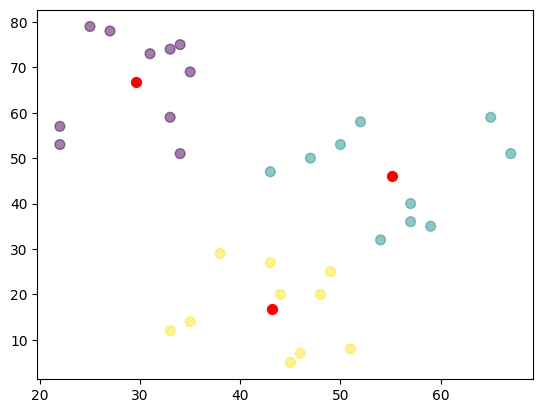

In [217]:
# a venir

# 1. on importe la lib 
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 2. On crée notre dataset
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
# print (df)

# 3. On utilise l'algoritme KMEANS pour créer nos 3 clusters et repérer nos centroids.
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids) # Coordonnées des centroids

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

# Une solution réaliste avec Folium

On voit que la logique Kmeans est bonne pour positionner nos fournisseurs sur la carte, mais pourrait-on plutôt entre des longitudes et latitudes et peut être afficher une carte en dessous ? Oui, on peut, avec la lib folium.


In [218]:
import folium
from IPython.display import display
from folium.plugins import Fullscreen
# Create the map object called m which is the base layer of the map
# Center at specific lcation 
# tiles is background layer of the map which you can select from below as well.
# Zoom level = the level you want to zoom at the beginning
m = folium.Map(location=[13.728680652566823, 100.362147071618],
               tiles='CartoDB positron',
               zoom_start=8)#if you need option that user can select background layer of the map
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Watercolor').add_to(m)
folium.TileLayer('CartoDB positron').add_to(m)# We can create other layers to separate our marker or any area we want to draw.
#name= layername that you want to show to user  '<u><b>layer1</b></u>'
# from above <u><b> are just CSS tag which to underline and bold respectively
# any plot on layer 1 will not show at the beginning because of show= False
layer1 = folium.FeatureGroup(name= '<u><b>layer1</b></u>',show= False)
m.add_child(layer1)
layer2 = folium.FeatureGroup(name= '<u><b>layer2</b></u>',show= True)
m.add_child(layer2)# marker 1 #draw marker with corlor you want (default is blue)
# and if you not specific icon , it shows (!)
# put it at base layer
folium.Marker(
        location=[13.82868065256, 100.3621470],
        title = 'marker1 at base',
        popup = 'marker1 at base',
        icon= folium.Icon(color='red')).add_to(m)
        
# marker 2 #draw marker with default marker
# put it to layer1 which will not show at the beginning
folium.Marker(
        location=[13.72868065256, 100.6621470],
        title = 'marker2 at layer1',
        popup = 'marker2 at layer1').add_to(layer1)# marker 3 #draw marker with corlor you want and assigned icon
# and if you not specific icon , it shows (!)
# put it at layer2
folium.Marker(
        location=[13.718685256, 100.3621470],
        title = 'marker1 at layer2',
        popup = 'marker1 at layer2',
        icon= folium.Icon(color='green',icon='ok-sign')).add_to(layer2)# to let the map have full screen button
Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',).add_to(m)# to let the map have selectd layer1 layer2 you created
folium.LayerControl(collapsed=True,position= 'bottomright').add_to(m)# save it to html then we can send the file to our colleagues
m.save('mymap.html')
display(m)

# Un exemple de couverture minimale de fournisseurs ( Minimal numbers of Facility locations)

In [219]:
# Exemple 2 - https://stackoverflow.com/questions/65684576/pulp-how-to-structure-this-factory-coverage-problem

""" Chaque ville est peuplée d'un nombre N de personnes.
Chaque emplacement de fournisseur peut fournir un ensemble de villes.
Minimiser le nombre d'usines à ouvrir, de sorte que le nombre de personnes facilitées soit >= 4000
 """


import pulp as pl

cities = ['London', 'Paris', 'Berlin', 'Amsterdam', 'Vienna', 'Prague']
factories = ['A', 'B', 'C', 'D']
city_populations = {'London': 898, 'Paris': 222, 'Berlin': 767, 'Amsterdam': 111, 'Vienna': 854, 'Prague': 908}
factories_service = {'A': ['London', 'Prague'], 'B': ['London', 'Paris', 'Vienna'], 'C': ['Amsterdam', 'Vienna', 'Prague'], 'D': ['London', 'Vienna', 'Prague']}

prob = pl.LpProblem("Factory_Coverage",pl.LpMinimize)

factories_vars = pl.LpVariable.dicts("Factories", factories, cat='Binary')
cities_vars = pl.LpVariable.dicts("Cities", cities, cat='Binary')

# La fonction objectif
prob += pl.lpSum(factories_vars)

# La population servie > 2000
prob += pl.lpSum([city_populations[c]*cities_vars[c] for c in cities]) >= 2000

# La ville est désservie seulement si il y a une usine qui la dessert
# City is served only if there is a factory that serves it
bigM = len(factories)
for c in cities:
    prob +=  bigM * cities_vars[c] >= pl.lpSum([factories_vars[f] for f in factories_vars if c in factories_service[f]])
    prob +=  cities_vars[c] <= pl.lpSum([factories_vars[f] for f in factories_vars if c in factories_service[f]])

prob.solve()



for f in factories_vars:
    print(f, factories_vars[f].value())
for c in cities_vars:
    print(c, cities_vars[c].value())

# The optimised objective function value is printed to the screen
print ("objectif - coût global minimisé : ",  (prob.objective))


A 0.0
B 0.0
C 0.0
D 1.0
London 1.0
Paris 0.0
Berlin 0.0
Amsterdam 0.0
Vienna 1.0
Prague 1.0
objectif - coût global minimisé :  Factories_A + Factories_B + Factories_C + Factories_D


# Capacited facility location : Exemple avec Pulp

Voici le code pour faire une optimisation capacited facility location.

- On a 3 fournisseurs, 5 clients.
- On a la demande des clients : 80,270,250,160,180.
- On a Les coûts fixes d'installation des fournisseurs et leurs capacité maximum.
- On a les coûts de transport vers chaque client.

In [220]:
from pulp import *

# LListe des clients et fournisseurs
Customer = [1,2,3,4,5]
Facility = ['Fac-1', 'Fac-2', 'Fac-3']

# Dictionnaires des demandes et capacité et coût engendré par les fournisseurs
Demand = {1 : 80, 2 : 270, 3 : 250, 4 : 160, 5 : 180}
Max_Supply = {'Fac-1' : 500, 'Fac-2' : 500, 'Fac-3' : 500} 
fixed_cost = {'Fac-1' : 1000, 'Fac-2' : 1000, 'Fac-3' : 1000 }

# Dictionnaire des coûts de transports entre les clients et les fournisseurs
transportation_cost = {'Fac-1' : {1 : 4, 2 : 5, 3 : 6, 4 : 8, 5 : 10},
                       'Fac-2' : {1 : 6, 2 : 4, 3 : 3, 4 : 5, 5 : 8},
                       'Fac-3' : {1 : 9, 2 : 7, 3 : 4, 4 : 3, 5 : 4}
                      }

# On crée notre problème de minimisation
prob = LpProblem("Capacitated_Facility_Location_Problem", LpMinimize)

# On définit les variables de décision
use_facility = LpVariable.dicts("Use Facility", Facility, 0, 1, LpBinary)
ser_customer = LpVariable.dicts("Service", [(i,j) for i in Customer for j in Facility], 0)

# On définit la fonction objectif :minimiser la somme des coûts fixes et coûts variables ( Coûts de transport)
prob += lpSum(fixed_cost[j]*use_facility[j] for j in Facility) + lpSum(transportation_cost[j][i]*ser_customer[(i,j)] for j in Facility for i in Customer)

# Les contraintes

# On doit satisfaire la demande client
for i in Customer:
    prob += lpSum(ser_customer[(i,j)] for j in Facility) == Demand[i]

# On ne peut pas dépasser la capacité des fournisseurs
for j in Facility:
    prob += lpSum(ser_customer[(i,j)] for i in Customer) <= Max_Supply[j]*use_facility[j]

# 
for i in Customer:
    for j in Facility:
        prob += ser_customer[(i,j)] <= Demand[i]*use_facility[j]

prob.solve()

print("Solution Status = ", LpStatus[prob.status])



# Print the solution of Binary Decision Variables
Tolerance = 0.0001
for j in Facility:
    if use_facility[j].varValue > Tolerance:
        print("Créer un Fournisseur au site = ", j)




# ON imprime les solution des variables continues
for v in prob.variables():
    print(v.name, "=", v.varValue)


# On imprime le coût total minimisé 
print("Coût total minimisé = ", value(prob.objective))

Solution Status =  Optimal
Créer un Fournisseur au site =  Fac-2
Créer un Fournisseur au site =  Fac-3
Service_(1,_'Fac_1') = 0.0
Service_(1,_'Fac_2') = 80.0
Service_(1,_'Fac_3') = 0.0
Service_(2,_'Fac_1') = 0.0
Service_(2,_'Fac_2') = 270.0
Service_(2,_'Fac_3') = 0.0
Service_(3,_'Fac_1') = 0.0
Service_(3,_'Fac_2') = 150.0
Service_(3,_'Fac_3') = 100.0
Service_(4,_'Fac_1') = 0.0
Service_(4,_'Fac_2') = 0.0
Service_(4,_'Fac_3') = 160.0
Service_(5,_'Fac_1') = 0.0
Service_(5,_'Fac_2') = 0.0
Service_(5,_'Fac_3') = 180.0
Use_Facility_Fac_1 = 0.0
Use_Facility_Fac_2 = 1.0
Use_Facility_Fac_3 = 1.0
Coût total minimisé =  5610.0


# 4. Affectations (Assignment)

- Introduction :

Les optimisations de type affectaction permettent par exemple d'affecter n employés à m tâches différentes, tout en minimisant le coût global d'emploi.
On peut aussi penser assigner tel ou tels groupe à tel projets sous contraintes diverses.
Des machines peuvent aussi être assignées à des tâches sous contraintes diverses.
On peut assigner des professeurs à des cours, des élèves à des transport en bus , un plan de routes la moins chère pour une compagnie de cars, etc...

<div style="text-align:center">
<img src="img/assignment.png">
</div>


- Le problème de base : 

J'ai 3 employés i et 3 tâches j à réaliser, chaque employé a un coût différent par tâche j, 
Comment affecter les employés afin de réduire le coût global d'embauche ?
<div style="text-align:center">
<img src="img/assign01.gif">
</div>


# Variantes

Déjà, on distingue que les tâches j peuvent avoir à être répétées n fois.
La notion de durée de la tâche n'est pas présente dans le cas de base, cependant, elle pourra être prise en compte.
Il est également possible d'imposer la mutualité: Un employé devra forcément réaliser la tâche b2 ,avec un autre employé ( Min employés = 2 pour 1 tâche donnée).
Tout cela implique de manipuler les Solveurs et les modélisations mathématique avec précision.

On récapitule donc les variantes, afin de les coder ensuite :

- Une tâche j pourrait avoir à être répétée m fois.
- Les tâches j pourraient être réalisées par k employés
- Les durées des tâches j pourraient influer sur le résultat.
- On peut éviter qu'un employé i ne réalise une tâche j précise, car il en est incapable.

# La modélisation mathématique

- Soit I un ensemble d'employés {i1,i2,i3...in}
- Soit J un ensemble de tâches {j1,j2,j3....jn}
- Soit i un employé donné
- Soit j une tâche donnée
- Soit cij le coût d'un employé entre un noeud i et j pour toute arrête ij
- Soit K l'ensemble des arrêtes possibles
- Soit vij la variable binaire de choix



# Résolution du problème de base avec Pulp

On résouds notre problème de base exposé un peu plus haut, avec Pulp.

<div style="text-align:center">
<img src="img/assign01.gif">
</div>


In [221]:
# Import
from pulp import *

employes=["Andre","Philippe","Mohammed"]
taches=["B1","B2","B3"]

# Matrice des coûts
couts=[[1,4,5],
      [5,7,6],
      [5,8,8]]

# C'est un problème de minimisation
prob = LpProblem("probleme_Affectation_lineaire", LpMinimize) 

# Les datas de couts sont transformés en un dictionnaire
costs= makeDict([employes,taches], couts, 0)

# On crée une liste de tuples qui contiennent tous les assignements possibles
assign = [(w, j) for w in employes for j in taches]

# Un dictionnaire appelé "vars" est créé pour contenir les variables référencées
vars = LpVariable.dicts("Affectation", (employes, taches), 0, None, LpBinary)

# La fonction objectif est toujours ajoutée en premier
prob += (
    lpSum([vars[w][j] * costs[w][j] for (w, j) in assign]),
    "Somme_couts_affectations",
)

# Il y a des contraintes lignes, chaque tâche peut être assignée à seulement 1 employé
for j in taches:
    prob+= lpSum(vars[w][j] for w in employes) == 1

# Il y a des contraintes colonnes, chaque employé peut être assigné à seulement un emploi.
for w in employes:
    prob+= lpSum(vars[w][j] for j in taches) == 1

# On résouds le pb, et on peut choisir le solveur entre les parenthèses
prob.solve()

# On imprime les variables qui ont leur valeur optimisées
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)
    
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Cout total des employes pour le projet = ", value(prob.objective))

Affectation_Andre_B2 = 1.0
Affectation_Mohammed_B1 = 1.0
Affectation_Philippe_B3 = 1.0
Cout total des employes pour le projet =  15.0


# Résolution du problème de base avec Google OR tools

On résouds le problème de base avec Google Or tools et on vérifie que l'on trouve pareil qu'avec Python Pulp. Et en effet, c'est le cas.

Voici le bon lien pour les problèmes d'affectation :
https://developers.google.com/optimization/assignment/assignment_example?hl=fr

In [222]:
from ortools.linear_solver import pywraplp


def main():
    # Data
    costs = [[1,4,5],
      [5,7,6],
      [5,8,8]]
    # Le nb d'employés est de la taille du tableau costs
    num_workers = len(costs)
    # Le nombre de tâches est de la taille de la pemière ligne du tableau costs
    num_tasks = len(costs[0])

    # Solver
    # Créez le solveur mip avec le backend SCIP.
    solver = pywraplp.Solver.CreateSolver('SCIP')

    if not solver:
        return

    #Variable
    # x[i, j] est un tableau de 0-1 variables, qui vaudra 1
    # si le travailleur i est affecté à la tâche j.
    x = {}
    for i in range(num_workers):
        for j in range(num_tasks):
            x[i, j] = solver.IntVar(0, 1, '')

    # Constraintes
    # Il y a des contraintes lignes, chaque tâche peut être assignée à seulement 1 employé
    for i in range(num_workers):
        solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) <= 1)

   # Il y a des contraintes colonnes, chaque employé peut être assigné à seulement un emploi.
    for j in range(num_tasks):
        solver.Add(solver.Sum([x[i, j] for i in range(num_workers)]) == 1)

    # Objectif
    objective_terms = []
    for i in range(num_workers):
        for j in range(num_tasks):
            objective_terms.append(costs[i][j] * x[i, j])
    solver.Minimize(solver.Sum(objective_terms))

    # Solve
    status = solver.Solve()

    # On imprime la solution
    if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
        print(f'Total cost = {solver.Objective().Value()}\n')
        for i in range(num_workers):
            for j in range(num_tasks):
                # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
                if x[i, j].solution_value() > 0.5:
                    print(f'Worker {i} assigned to task {j}.' +
                          f' Cost: {costs[i][j]}')
    else:
        print('No solution found.')


if __name__ == '__main__':
    main()

Total cost = 15.0

Worker 0 assigned to task 0. Cost: 1
Worker 1 assigned to task 2. Cost: 6
Worker 2 assigned to task 1. Cost: 8


# 1 ère variante.

On veut exécuter chaque tâches 5 fois par <b>le même</b> employé j, et toujours minimiser le coût global d'embauches.

<div style="text-align:center">
<img src="img/assign02.gif">
</div>
Si on tente de résoudre à la main, on se dit qu'on va affecter André à B1, puisque c'est le moins cher, mais le problème est que ensuite, les coûts de Philippe et Mohammed font que cela devient trop cher .
Le solveur, lui,  minimise la solution et propose un coût global de 75.


Essais à la main :

andre  * B1 = 5
philippe * B3 = 35
mohammed * B2 = 45
Total : 85 ( trop cher)

andre * B1 = 5
mohammed * B3 = 40
philippe * B2 = 35
Total : 80 ( trop cher)

Résultat du solveur :
andre * B2 = 20
philippe * B3 = 30
mohammed * B1 = 25
Total = 75

In [223]:
# Import
from pulp import *

employes=["Andre","Philippe","Mohammed"]
taches=["B1","B2","B3"]

# Matrice des coûts
couts=[[1,4,5],
      [5,7,6],
      [5,8,8]]

# C'est un problème de minimisation
prob = LpProblem("probleme_Affectation_lineaire", LpMinimize) 

# Les datas de couts sont transformés en un dictionnaire
costs= makeDict([employes,taches], couts, 0)

# On crée une liste de tuples qui contiennent tous les assignements possibles
assign = [(w, j) for w in employes for j in taches]

# Un dictionnaire appelé "vars" est créé pour contenir les variables référencées
vars = LpVariable.dicts("Affectation", (employes, taches), 0, None, LpInteger)

# La fonction objectif est toujours ajoutée en premier
prob += (
    lpSum([vars[w][j] * costs[w][j] for (w, j) in assign]),
    "Somme_couts_affectations",
)

# Il y a des contraintes lignes, chaque tâche **doit**  être assignée 5 fois
for j in taches:
    prob+= lpSum(vars[w][j] for w in employes) >= 5

# Il y a des contraintes colonnes, chaque employé **peut** être assigné 5 fois
for w in employes:
    prob+= lpSum(vars[w][j] for j in taches) >= 5

# On résouds le pb, et on peut choisir le solveur entre les parenthèses
prob.solve()

# On imprime les variables qui ont leur valeur optimisées
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)
    
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Cout total des employes pour le projet = ", value(prob.objective))

Affectation_Andre_B2 = 5.0
Affectation_Mohammed_B1 = 5.0
Affectation_Philippe_B3 = 5.0
Cout total des employes pour le projet =  75.0


# 2 ème variante

On veut désormais que chaque tâche j puisse être exécutée par plusieurs employés, et réduire le côut global d'embauche.

<div style="text-align:center">
<img src="img/assign02.gif">
</div>

On voit que André est sélectionné plusieurs fois sur plusieurs tâches car c'est l'employé le moins cher, le coût total du projet est alors réduit à son maximum, mais André est "surbooké".
Dans le code, on peut forcer Mohammed à être sélectionné plusieurs fois en se servant de son indice.

In [224]:
# Import
from pulp import *

employes=["Andre","Philippe","Mohammed"]
taches=["B1","B2","B3"]

# Matrice des coûts
couts=[[1,4,5],
      [5,7,6],
      [5,8,8]]

# C'est un problème de minimisation
prob = LpProblem("probleme_Affectation_lineaire", LpMinimize) 

# Les datas de couts sont transformés en un dictionnaire
costs= makeDict([employes,taches], couts, 0)

# On crée une liste de tuples qui contiennent tous les assignements possibles
assign = [(w, j) for w in employes for j in taches]

# Un dictionnaire appelé "vars" est créé pour contenir les variables référencées
vars = LpVariable.dicts("Affectation", (employes, taches), 0, None, LpInteger)

# La fonction objectif est toujours ajoutée en premier
prob += (
    lpSum([vars[w][j] * costs[w][j] for (w, j) in assign]),
    "Somm_couts_affectations",
)

# Il y a des contraintes lignes, chaque tâche doit être assignée 5 fois
for j in taches:
    prob+= lpSum(vars[w][j] for w in employes) >= 5

# Il y a des contraintes colonnes, chaque employé doit être assigné , et peut être assigné plus d' 1 fois
for w in employes:
    prob+= lpSum(vars[w][j] for j in taches) >= 1

# On résouds le pb, et on peut choisir le solveur entre les parenthèses
prob.solve()

# On imprime les variables qui ont leur valeur optimisées
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)
    
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Cout total des employes pour le projet = ", value(prob.objective))

Affectation_Andre_B1 = 5.0
Affectation_Andre_B2 = 5.0
Affectation_Andre_B3 = 3.0
Affectation_Mohammed_B3 = 1.0
Affectation_Philippe_B3 = 1.0
Cout total des employes pour le projet =  54.0


# 3 ème variante.

Les durées des tâches pourraient influer sur le résultat final.

<div style="text-align:center">
<img src="img/assign03.gif">
</div>


# 5. Gestion de projet.

# Introduction.

Dans un projet, les noeuds sont les tâches et les arrêtes la durée.
Les contraintes sont principalement les précédences des tâches.

Lire mon notebook 06. Optimisation en gestion de projet pour en savoir plus...


# 6. Problèmes de couverture.

## Notre exemple de base.

On a un ensemble S {1,2,3,4,5}.

On a des sous ensembles divers : {1,2} {1,2,3} ,{3,4} ,{2,4,5}, {1,4,5},{3,4,5},{5}

On veut minimiser le nombre de sous ensembles capables de couvrir toutes les valeurs de S.

Si on choisit {1,2}, {3,4} et {5}, on a couvert l'ensemble des valeurs de S avec 3 sous ensembles, mais il existe une meilleure solution : {1,2} et {3,4,5} qui fait un total de 2 sous ensembles. Mais on remarque aussi que, si l'on accepte les doublons, le couple {1,2,3} et {3,4,5} couvre l'ensemble S.


## Modélisation mathématique.

A venir !

## Solution avec l'algo Glouton (Greedy)

In [225]:
ensemble = set(["1", "2", "3", "4", "5"])

sous_ensemble = {}

sous_ensemble["se1"] = set(["1", "2"])
sous_ensemble["se2"] = set(["1", "2", "3"])
sous_ensemble["se3"] = set(["3", "4"])
sous_ensemble["se4"] = set(["2", "4", "5"])
sous_ensemble["se5"] = set(["1", "4", "5"])
sous_ensemble["se6"] = set(["3", "4", "5"])
sous_ensemble["se7"] = set(["5"])

final_sous_ensemble = set()

while ensemble:
  meilleur_sous_ensemble = None
  sous_ensemble_non_couverts = set()
  
  for s_e, e_for_s_e in sous_ensemble.items():
    covered = ensemble & e_for_s_e
    if len(covered) > len(sous_ensemble_non_couverts):
      meilleur_sous_ensemble = s_e
      sous_ensemble_non_couverts = covered

  ensemble -= sous_ensemble_non_couverts
  final_sous_ensemble.add(meilleur_sous_ensemble)

print(final_sous_ensemble)

{'se2', 'se4'}


## Explication

C'est un algorithme glouton, l'intersection d'ensemble permet d'être le "plus gourmand" à chaque étape, en choisissant l'ensemble qui couvre le plus (c'est-à-dire qui a la plus grande intersection) des éléments de l'ensemble qui n'ont pas été couverts. Dans la preuve formelle du coût de cet algorithme d'approximation gourmande par rapport à l'algorithme optimal (force brute), l'intersection d'ensembles est utilisée pour relier le "prix" payé pour chaque élément des ensembles choisis au nombre d'ensembles choisis.


# Couverture par sous ensembles minimum 

## Description

https://optimization.cbe.cornell.edu/index.php?title=Set_covering_problem

Le problème de la localisation optimale

Cet ensemble de problèmes de couverture concerne la maximisation de la couverture de certaines installations publiques placées à différents endroits.  Considérez le problème de placer des casernes de pompiers pour desservir les quartiers d'une ville.  Si chaque caserne de pompiers peut desservir sa ville et toutes les villes adjacentes, nous pouvons formuler un problème de couverture d'ensemble où chaque sous-ensemble consiste en un ensemble de villes adjacentes. Le problème est ensuite résolu pour minimiser le nombre de casernes de pompiers nécessaires pour desservir toute la ville.

Soit yi la variable de décision correspondant au choix de construire une caserne de pompiers dans le quartier i . Soit Si un sous-ensemble de villes comprenant quartier i et tous ses voisins. Le problème est alors formulé comme suit.

<img src = "img/dfc752c9f2198c8841d836c1b1b8c59b5f96c3bc.svg">



## Exemple 1 : Sélectionner le ou les quartiers qui couvre tout un plan

Imaginons une ville avec 5 quartiers.

- Le quartier 1 est adjacent avec 2 et 5 ( et avec lui même)
- Le quartier 2 est adjacent avec 1 et 5 ( et avec lui même)
- Le quartier 3 est adjacent avec 4 ( et avec lui même)
- Le quartier 4 est adjacent avec 5 ( et avec lui même)
- Le quartier 5 est adjacent avec 1 et 2 et 3 et 4 ( et avec lui même) -> c'est donc celui ci à choisir

Donc, si on doit placer un distributeur, il faut le placer dans le quartier 5.

# Solution avec Pulp

Voyons si Pulp sélectionne correctement le nombre minimal de quartiers.

In [226]:
from pulp import *
 
Q1 = LpVariable('Q1', lowBound=0, cat='Binary')
Q2 = LpVariable('Q2', lowBound=0, cat='Binary')
Q3 = LpVariable('Q3', lowBound=0, cat='Binary')
Q4 = LpVariable('Q4', lowBound=0, cat='Binary')
Q5 = LpVariable('Q5', lowBound=0, cat='Binary')

# La matrice est là pour indication , mais normalement, on doit s'en servir dans le 
# code python
adjacence_matrix = [
   # Q1,Q2,Q3,Q4,Q5
    [1, 1, 0, 0, 1], # Q1
    [1, 1, 0, 0, 1], # Q2
    [0, 0, 1, 0, 1], # Q3
    [0, 0, 0, 1, 1], # Q4
    [1, 1, 1, 1, 1], # Q5
]

Problem = LpProblem('set_covering',LpMinimize)

# Objective
Problem += Q1 + Q2 + Q3 + Q4 + Q5

# Constraints
Problem += Q1 + Q2 + Q5 >= 1
Problem += Q1 + Q2 + Q5 >= 1
Problem += Q3 + Q4 >= 1
Problem += Q4 + Q5 >= 1
Problem += Q1 + Q2 + Q3 + Q4 + Q5 >= 1


Problem.solve()
 
print('Objectif = ', value(Problem.objective))
 
for i in Problem.variables():
    print('Selection:',i.name, '=', i.varValue)

Objectif =  2.0
Selection: Q1 = 0.0
Selection: Q2 = 0.0
Selection: Q3 = 1.0
Selection: Q4 = 0.0
Selection: Q5 = 1.0


Si par contre, on enlêve une adjacence au quartier 5 qui touchait tous les quartiers, alors on obtient une sélection différente :
On précise au solveur que le quartier 1 ne touche plus le quartier 5 ,
On voit que le solveur pour établir la couverture totale choisit désormais le quartier 1 et 5.

In [227]:
from pulp import *
 
Q1 = LpVariable('Q1', lowBound=0, cat='Binary')
Q2 = LpVariable('Q2', lowBound=0, cat='Binary')
Q3 = LpVariable('Q3', lowBound=0, cat='Binary')
Q4 = LpVariable('Q4', lowBound=0, cat='Binary')
Q5 = LpVariable('Q5', lowBound=0, cat='Binary')

# La matrice est là pour indication , mais normalement, on doit s'en servir dans le 
# code python
adjacence_matrix = [
   # Q1,Q2,Q3,Q4,Q5
    [1, 1, 0, 0, 0], # Q1
    [1, 1, 0, 0, 1], # Q2
    [0, 0, 1, 0, 1], # Q3
    [0, 0, 0, 1, 1], # Q4
    [0, 1, 1, 1, 1], # Q5
]

Problem = LpProblem('set_covering',LpMinimize)

# Objective
Problem += Q1 + Q2 + Q3 + Q4 + Q5

# Constraints
Problem += Q1 + Q2  >= 1
Problem += Q1 + Q2 + Q5 >= 1
Problem += Q3 + Q4 >= 1
Problem += Q4 + Q5 >= 1
Problem += Q2 + Q3 + Q4 + Q5 >= 1


Problem.solve()
 
print('Objectif = ', value(Problem.objective))
 
for i in Problem.variables():
    print('Selection:',i.name, '=', i.varValue)

Objectif =  2.0
Selection: Q1 = 1.0
Selection: Q2 = 0.0
Selection: Q3 = 0.0
Selection: Q4 = 1.0
Selection: Q5 = 0.0


## Exemple 2 : Sélectionner le nombre minimum de caméras pour couvrir toute une ville

Admettons que j'ai un certains nombre de rues adjacentes, comment placer le nombre minimal de caméras tout en ayant une couverture totale de chaque rues ( Et, donc, une surveillance optimale), afin d'économiser de l'argent, parce que les caméras, c'est cher ?

## Notre exemple
Pour l'exemple concret, on ne s'embête pas, et on prends directement celui de wikipédia de l'université Cornell, en Anglais, On veut donc l'installation minimale de caméras de surveillance, sous contrainte de la couverture intégrale d'un stade de sport.
Si on les place au petit bonheur la chance, on va dépenser trop et on aura probablement pas une couverture intégrale du stade, en plus !

Le lien: https://optimization.cbe.cornell.edu/index.php?title=Set_covering_problem

<b>Les couvertures par zones de stade</b>

<div style="text-align:center">
<img src="img/cam_location1.png">
</div>

<b>Les couvertures exprimées en variables binaires</b>

<div style="text-align:center">
<img src="img/cam_location2.png">
</div>


## Modélisation mathématique

- Soit Z un ensemble de 8 caméras {z1,z2,z3....z8}.
- Soit J un ensemble de 15 zones du stade {j1,j2,j3,j4...j15}.
- Soit Zj une variable binaire qui indique si une caméra est installée dans une zone ji du stade
Zj = 1 si elle est installée, Zj = 0 si elle n'est pas installée.
 

<b>L'objectif</b> : 
C'est de minimiser la somme de Zj

<b>Les contraintes</b> :
pour chaque zone i de stade( Ce sont j1,j2,j3...j15), il y a une contrainte que i doit être couvert par au moins une caméra.

Par exemple, pour la zone 1 du stade, z1 + z4 + z7 + z8 >= 1
et pour la zone 2 du stade, z3 + z4 + z7 + z8 >= 1


## Solution avec Python Pulp
Le résultat est le même que celui de Cornel University

In [228]:
from pulp import *
 
CAM1 = LpVariable('CAM1', lowBound=0, cat='Binary')
CAM2 = LpVariable('CAM2', lowBound=0, cat='Binary')
CAM3 = LpVariable('CAM3', lowBound=0, cat='Binary')
CAM4 = LpVariable('CAM4', lowBound=0, cat='Binary')
CAM5 = LpVariable('CAM5', lowBound=0, cat='Binary')
CAM6 = LpVariable('CAM6', lowBound=0, cat='Binary')
CAM7 = LpVariable('CAM7', lowBound=0, cat='Binary')
CAM8 = LpVariable('CAM8', lowBound=0, cat='Binary')


Problem = LpProblem('couverture_de_cameras_minimale',LpMinimize)

# Objectif :
# Minimiser le nombre de caméras qui sont des variables binaires prenant la valeur 1 ou 0
Problem += CAM1 + CAM2 + CAM3 + CAM4 + CAM5 + CAM6 + CAM7 + CAM8

# Constraintes.
# Ces contraintes sont pour chaque zone de stade
# On écrit bêtement le tableau binaire montré plus haut.
Problem += CAM1 + CAM4 + CAM7 + CAM8  >= 1
Problem += CAM3 + CAM4 + CAM7 + CAM8  >= 1
Problem += CAM1 + CAM5  >= 1
Problem += CAM1 + CAM2 + CAM8  >= 1
Problem += CAM3  >= 1
Problem += CAM1 + CAM5 + CAM7 + CAM8  >= 1
Problem += CAM1 + CAM2  >= 1
Problem += CAM2 + CAM6 + CAM8  >= 1
Problem += CAM3  >= 1
Problem += CAM5  >= 1
Problem += CAM3 + CAM7  >= 1
Problem += CAM2 + CAM5 + CAM8 >= 1
Problem += CAM3 >= 1 # Oui c'est en doublon
Problem += CAM4 + CAM5 + CAM6 >= 1
Problem += CAM4 + CAM6 >= 1

Problem.solve()
 
print('nombre de caméras minimisé = ', value(Problem.objective))
 
for i in Problem.variables():
    print('Selection de la caméra:',i.name, '=', i.varValue)

nombre de caméras minimisé =  4.0
Selection de la caméra: CAM1 = 0.0
Selection de la caméra: CAM2 = 1.0
Selection de la caméra: CAM3 = 1.0
Selection de la caméra: CAM4 = 1.0
Selection de la caméra: CAM5 = 1.0
Selection de la caméra: CAM6 = 0.0
Selection de la caméra: CAM7 = 0.0
Selection de la caméra: CAM8 = 0.0


# Sélection d'employés par couverture minimales des compétences nécessaires au projet 

## L'histoire :
Source : https://www.comp.nus.edu.sg/~stevenha/cs4234/lectures/03a.SetCover.pdf

Supposons que vous disposiez d'un ensemble de développeurs de logiciels : Alice, Bob, Collin et Dave. Chaque programmeur sait au moins un langage de programmation. Alice connaît le C et le C++. Bob connaît C++ et Java. Collin connaît C++, Ruby,et Python. Dave connaît C et Java. Votre travail consiste à embaucher une équipe de programmeurs. <br>

Deux exigences vous sont imposées : 
- (i) il doit y avoir au moins une personne dans l'équipe qui connaît chaque langage (c'est-à-dire C, C++, Java, Python et Ruby), et(ii) votre équipe doit être aussi petite que possible (peut-être que votre équipe fonctionne avec un budget serré).<br>

Il s'agit précisément d'un problème MIN-SET-COVER. Les éléments de base X sont les 5 langages de programmation différents. Chaque programmeur représente un ensemble. Votre travail consiste à trouver le nombre minimum de programmeurs (c'est-à-dire le nombre minimum de ensembles) de telle sorte que chaque langue soit couverte.


<div style="text-align:center">
<img src="img/min-cover.jpg">
</div>



## La solution avec Python PULP

In [229]:
from pulp import *
 
# les variables de décision sont les employés
ALICE = LpVariable('ALICE', lowBound=0, cat='Binary')
BOB = LpVariable('BOB', lowBound=0, cat='Binary')
COLLIN = LpVariable('COLLIN', lowBound=0, cat='Binary')
DAVE = LpVariable('DAVE', lowBound=0, cat='Binary')

# On définit votre problème de minimisation
Problem = LpProblem('couverture_minimale_dEmployes',LpMinimize)

# Objectif :
# Minimiser le nombre de développeurs, tout en ayant une couverture de compétences totale 
# pour notre projet
Problem += ALICE + BOB + COLLIN + DAVE 

# Constraintes.

# COmpétences en python
Problem += COLLIN  >=1
# Compétences en Ruby
Problem += COLLIN >=1
# Compétences en C++
Problem += COLLIN + BOB + ALICE >=1
# COmpétences en java
Problem += BOB + DAVE >=1
# Compétences en C
Problem += ALICE + DAVE >=1

Problem.solve()
 
print('nombre d employés minimisé = ', value(Problem.objective))
 
for i in Problem.variables():
    print('Selection de l employé:',i.name, '=', i.varValue)

nombre d employés minimisé =  2.0
Selection de l employé: ALICE = 0.0
Selection de l employé: BOB = 0.0
Selection de l employé: COLLIN = 1.0
Selection de l employé: DAVE = 1.0


Dans l'exemple précédent, on voit que le Solveur calcule bien que seuls les employés Collin et Dave sont nécessaires pour couvrir toutes les compétences nécessaires dans notre projet ( en Anglais , c'est le Minimum set covering problem)

Par contre, on voit que les contraintes sont écrites en dur dans le code Python PULP, qu'en sera-t-il le jour ou on aura 150 employés et 250 compétences différentes ? On ne va pas écrire 250 lignes à la main, il faut absolument transformer le code et réussir à itérer sur des tableaux d'employés et de compétences.. Ce qui nécessite un niveau supérieur en modélisation.

Allez, on essaye : 

## Solution en itérant

In [280]:

from pulp import *
 
# les variables de décision sont les employés
employes=["COLLIN","BOB","ALICE","DAVE"]
langages=["PYTHON","JAVA","C++","RUBY","C"]

# Matrice des aptitudes
# Les lignes sont chaque employés
# Les colonnes sont la variable binaire si ils maitrisent le langage, ou pas. (1 = oui , 0 = non)
            # Python, Ruby, C++, JAVA, C
aptitudes= [[1,1,1,0,0],
            [0,0,1,1,0],
            [0,0,1,0,1],
            [0,0,0,1,1],
            ]
#           COllin, Bob, Alice, Dave
# aptitudes= [[1,0,0,0],
#             [1,0,0,0],
#             [1,1,1,0],
#             [0,1,0,1],
#             [0,0,1,1],
#             ]

# On définit votre problème de minimisation
Problem = LpProblem('couverture_minimale_dEmployes',LpMinimize)

# COntrairement à la version d'avant
# A la place d'écrire en dur les variables de décision, on laisse Pulp les créér automatiquement.
vars = p.LpVariable.dicts("employe", employes, 0, None, p.LpBinary)
print(vars)

# Objectif :
# Minimiser le nombre de développeurs, tout en ayant une couverture de compétences totale 
# pour notre projet
# Ici, on a la même fonction objectif que la version d'avant, sauf qu'on itère sur les 
# variables de décision que Pulp a créé.
Problem += lpSum(vars[i] for i in employes)

# Les contraintes 
# C'est la partie la plus difficile à recréer en itérant.

# COmpétences en python
for j in aptitudes:

    x = 0
    Problem += lpSum( [j[x] * vars[i] for i in employes ]) >= 1
# Compétences en Ruby
for j in aptitudes:
    x = 1
    Problem += lpSum( [j[x] * vars[i] for i in employes ]) >= 1
# Compétences en C++
for j in aptitudes:
    x = 2
    print(j[x])
    Problem += lpSum( [j[x] * vars[i] for i in employes ]) >= 1
# COmpétences en java
for j in aptitudes:
    x = 3
    Problem += lpSum( [j[x] * vars[i] for i in employes ]) >= 1
    
# Compétences en C
for j in aptitudes:
  
    x = 4
    
    Problem += lpSum( [j[x] * vars[i] for i in employes ]) >= 1


   



  

# On résouds le pb, et on peut choisir le solveur entre les parenthèses
Problem.solve()

print('nombre d employés minimisé = ', value(Problem.objective))
 
for i in Problem.variables():
    print('Selection de l employé:',i.name, '=', i.varValue)

{'COLLIN': employe_COLLIN, 'BOB': employe_BOB, 'ALICE': employe_ALICE, 'DAVE': employe_DAVE}
1
1
1
0
nombre d employés minimisé =  1.0
Selection de l employé: employe_ALICE = 0.0
Selection de l employé: employe_BOB = 1.0
Selection de l employé: employe_COLLIN = 0.0
Selection de l employé: employe_DAVE = 0.0


## Couverture par sous ensembles minimum avec prise en compte du poids

In [231]:
# A venir !

#  Liens

Transport:

- https://www.coin-or.org/PuLP/CaseStudies/a_transportation_problem.html
- https://github.com/hakeemrehman/Python-PuLP-/blob/master/Transportation%20Problem%20(PUNJAB%20FLOUR%20Mill).ipynb

Transshipment:

- https://learnwithpanda.com/2021/01/26/how-to-solve-linear-programming-lp-problems-using-python/

Facility location:

    - Uncapacited facility location:
        - https://github.com/Jeevesh28/Facility-Location-Problem
        - https://www.dcc.fc.up.pt/~jpp/mad1920/teorica-17_int-programming-07.pdf

- http://ibmdecisionoptimization.github.io/docplex-doc/mp/chicago_coffee_shops.html
- https://github.com/xNok/OR_location_routing_problem_study/tree/master        
- https://en.wikipedia.org/wiki/Facility_location_problem
- https://scipbook.readthedocs.io/en/latest/flp.html
- http://www.fedoa.unina.it/9474/1/Barbati_Maria_25.pdf
- https://towardsdatascience.com/optimization-capacitated-facility-location-problem-in-python-57c08f259fe0

Assignment:

- https://www.youtube.com/watch?v=KsX44rMkqcc
- https://machinelearninggeek.com/solving-assignment-problem-using-linear-programming-in-python/

Set cover: 

- https://en.wikipedia.org/wiki/Set_cover_problem



Frameworks d'optimisation:
- SCIP Optimization Suite - pyscipopt

Liens généraux: 
- https://developers.google.com/optimization/routing
- https://www.ibm.com/docs/en/icos/20.1.0?topic=cplex-python-examples
- https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/03.01-Transportation-Networks.html
- https://machinelearninggeek.com/solving-transportation-problem-using-linear-programming-in-python/
- https://gist.github.com/michiru123/59703138a1acc4c151cd9718ed824928
- https://scipbook.readthedocs.io/en/latest/intro.html#transportation-problem
- https://www.scipopt.org/index.php#welcome